In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']]
x

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y=df['diabetes']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=0)

In [7]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [8]:
model=KNeighborsClassifier()

In [9]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
y_predict=model.predict(x_test)
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [11]:
accuracy_score(y_predict,y_test)

0.7489177489177489

In [12]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[134,  23],
       [ 35,  39]], dtype=int64)

In [13]:
# Calculate the ROC curve
y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob

array([1. , 0.2, 0. , 0.6, 0.2, 0. , 0.6, 0.8, 0.4, 0.4, 0.6, 1. , 0.2,
       0. , 0.4, 0.2, 0.8, 0. , 0.8, 0.4, 0.4, 0.2, 0. , 0.2, 0. , 0. ,
       0. , 0.8, 0. , 0.2, 0.6, 0.4, 0.2, 0.6, 0.2, 0.8, 0.6, 0.2, 0.4,
       0.4, 0.4, 0. , 0.2, 1. , 0.8, 0. , 0.4, 0.2, 0.2, 0.2, 0.4, 0.4,
       0.6, 0.4, 0.2, 0.4, 0.2, 0.2, 0. , 0. , 1. , 0.4, 0. , 0.8, 1. ,
       1. , 0.8, 0.4, 0.8, 0.4, 0. , 0.2, 0. , 1. , 1. , 0.2, 0.2, 0.6,
       0.2, 0.2, 0.4, 0.2, 0. , 0. , 0.2, 0. , 0.2, 0.2, 1. , 0. , 0.4,
       0.4, 0.2, 0. , 0.6, 0.2, 0.2, 0.6, 0.2, 0.6, 0. , 0. , 0. , 0. ,
       0.2, 0.4, 0.2, 0. , 0. , 0.8, 0. , 0.2, 0.6, 0.2, 0.6, 0.8, 0.2,
       0.8, 0.2, 0.6, 0.8, 0.6, 0.2, 0.4, 0.2, 0. , 0.2, 0.6, 0.8, 1. ,
       0.4, 0. , 0. , 0.8, 0. , 0.4, 0.2, 0. , 0.8, 0.6, 0. , 0.6, 0. ,
       0. , 0.8, 0. , 0. , 0.4, 0. , 0. , 0. , 0.2, 0. , 0.4, 0.8, 0. ,
       0.6, 0. , 0.2, 0.6, 0.8, 0.6, 0.2, 0. , 1. , 0.2, 0. , 0. , 0.6,
       0.2, 0. , 0. , 0.2, 0.6, 0.4, 0. , 0. , 0. , 0.4, 0. , 0.

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
print("false positive rate : \n",fpr)
print("true positive rate : \n",tpr)
print("threash hold :\n: ",thresholds)

false positive rate : 
 [0.         0.01910828 0.06369427 0.14649682 0.35031847 0.60509554
 1.        ]
true positive rate : 
 [0.         0.12162162 0.31081081 0.52702703 0.62162162 0.89189189
 1.        ]
threash hold :
:  [inf 1.  0.8 0.6 0.4 0.2 0. ]


In [15]:

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7289120330521606

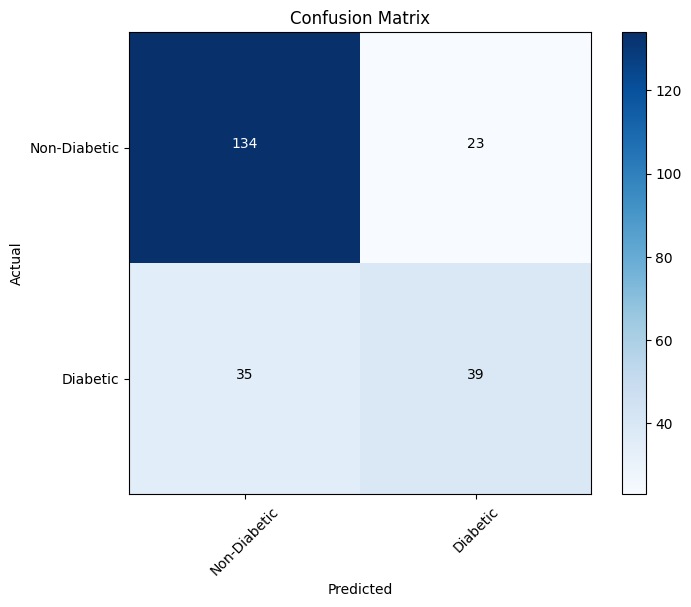

In [16]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Non-Diabetic', 'Diabetic'], rotation=45)
plt.yticks(tick_marks, ['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(2):
    for j in range(2):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")

plt.show()


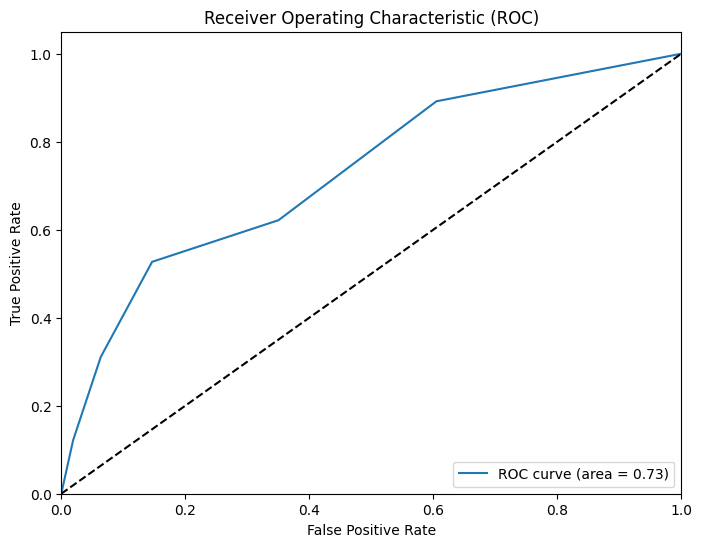

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()